# ActiveSVC for gene/feature selection for Zebrahub dataset

In [ ]:
!pip install activeSVC==4.0.1
!pip install psutil

In [28]:
import numpy as np
import time
import random
import os

from sklearn.preprocessing import normalize 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib import gridspec

from activeSVC import min_complexity, min_acquisition
import pandas as pd
import pickle
import os, psutil
import resource


# def text_create(path, name, msg):
#     full_path = path + "/" + name + '.pickle'
#     f=open(full_path,'wb') 
#     pickle.dump(msg,f)
#     f.close()

# class TimerError(Exception):
#      """A custom exception used to report errors in use of Timer class"""

# class Timer:
#     def __init__(self):
#         self._start_time = None

#     def start(self):
#         if self._start_time is not None:
#             raise TimerError(f"Timer is running. Use .stop() to stop it")

#         self._start_time = time.perf_counter()

#     def stop(self):
#         if self._start_time is None:
#             raise TimerError(f"Timer is not running. Use .start() to start it")

#         elapsed_time = time.perf_counter() - self._start_time
#         self._start_time = None
#         print(f"Total run time: {elapsed_time:0.4f} seconds")
#         return elapsed_time
        




# Download and Load Tabula Muris Data

In [4]:
# import urllib.request
# import shutil

# with urllib.request.urlopen("https://caltech.box.com/shared/static/p2bjcw4ym5ow22yc5h2ld4d7m5wzrw8t.pickle") as response, open('./tabula.pickle', "wb") as out_file:
#     shutil.copyfileobj(response, out_file)


In [5]:
# import pickle
# with open('tabula.pickle','rb') as handle:
#     raw_data = pickle.load(handle)
#     gene=np.array(pickle.load(handle))
#     target=np.array(pickle.load(handle))


# data=normalize(np.transpose(raw_data),axis=1, norm='l2')

# del raw_data

# idx = np.arange(np.shape(data)[0])
# random.shuffle(idx)
# X_train = data[idx[:int(np.shape(data)[0]*4/5)],:]
# y_train = target[idx[:int(np.shape(data)[0]*4/5)]]
# X_test = data[idx[int(np.shape(data)[0]*4/5):],:]
# y_test = target[idx[int(np.shape(data)[0]*4/5):]]

# print(np.shape(data),np.shape(target),len(np.unique(target)))
# print(np.shape(X_train))
# print(np.shape(X_test))

(55656, 8661) (55656,) 58
(44524, 8661)
(11132, 8661)


# Load Zebrahub dataset
- For now, let's just load 1dpf, as we know the gene sets used for the annotation (by Xiang Zhao)


In [24]:
import scanpy as sc
import anndata as ad

data_zebrahub = sc.read_h5ad("/mnt/ibm_lg/alejandro/danio-atlas/zebrahub/final_objects/v4/zf_atlas_24hpf_v4_release.h5ad")


In [25]:
data_zebrahub

AnnData object with n_obs × n_vars = 12914 × 32060
    obs: 'n_genes', 'n_counts', 'fish', 'timepoint_cluster', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_nc', 'pct_counts_nc', 'zebrafish_anatomy_ontology_class', 'zebrafish_anatomy_ontology_id', 'developmental_stage', 'timepoint'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'nc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'timepoint_colors', 'zebrafish_anatomy_ontology_class_colors'
    obsm: 'X_umap'
    layers: 'counts'

In [27]:
np.sum(np.expm1(data_zebrahub.X.todense()),1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]], dtype=float32)

# min_complexity

## Define Parameters and Work Space

In [17]:
'''
Parameters
'''
num_features = 50
num_samples=20
init_samples=50
balance=False

folder='results/min_complexity'
path=folder+'/test_'+str(num_features)+'_'+str(num_samples)

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(folder)
except OSError:
    print ("Creation of the directory %s failed" % folder)
else:
    print ("Successfully created the directory %s " % folder)
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory results 
Successfully created the directory results/min_complexity 
Successfully created the directory results/min_complexity/test_50_20 


## Select Genes and Save Results

In [ ]:
if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, train_errors,test_errors,train_scores,test_scores, step_times= min_complexity(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples,init_samples=init_samples, balance=balance)
    elapsed_time=t.stop()
    
    memorys=[]
    memorys.append(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)
    memorys.append(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/ 1024 ** 2)
    
    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'genes_name',gene[feature_selected])
    text_create(path,'elapsed_time',elapsed_time)
    text_create(path,'memory',memorys)

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")

Elapsed time: 15.0250 seconds
feature 0 : gene [0]  50 samples
training error=318.0508040607313 test error=321.3496227093065
training accuracy=0.17318749438505077 test accuracy=0.1747215235357528
Elapsed time: 18.9656 seconds
feature 1 : gene 5609  70 samples
training error=336.52362770640553 test error=336.87324829320875
training accuracy=0.2422064504536879 test accuracy=0.24074739489759253
Elapsed time: 14.7583 seconds
feature 2 : gene 5611  90 samples
training error=293.43165483784026 test error=289.6681638519583
training accuracy=0.3941245171143653 test accuracy=0.39543657923104564
Elapsed time: 14.1901 seconds
feature 3 : gene 920  110 samples
training error=291.4363040158117 test error=292.61327703916635
training accuracy=0.4111041236187225 test accuracy=0.41088753144089113
Elapsed time: 14.2382 seconds
feature 4 : gene 2707  130 samples
training error=282.26212829036024 test error=282.14885016169603
training accuracy=0.49957326385769474 test accuracy=0.5013474667624865
Elapsed t

Elapsed time: 17.9854 seconds
feature 42 : gene 4733  858 samples
training error=54.96992633186596 test error=58.947269134028026
training accuracy=0.8810753750786093 test accuracy=0.8743262666187568
Elapsed time: 18.1705 seconds
feature 43 : gene 2399  878 samples
training error=54.71774773156051 test error=59.69286740927057
training accuracy=0.8838379301051118 test accuracy=0.8771110312612289
Elapsed time: 17.8266 seconds
feature 44 : gene 458  897 samples
training error=54.62022729314527 test error=59.54671218109953
training accuracy=0.8844892642170514 test accuracy=0.8786381602587137
Elapsed time: 18.0349 seconds
feature 45 : gene 1722  917 samples
training error=54.12256311202947 test error=58.47161336687029
training accuracy=0.8864657263498338 test accuracy=0.8800754581386993


# min_aquisition

## Define Parameters and Work Space

In [ ]:
'''
Parameters
'''
num_features = 20
num_samples=30
init_samples=50

folder='results/min_acquisition'
path=folder+'/test_'+str(num_features)+'_'+str(num_samples)

try:
    os.mkdir('results')
except OSError:
    print ("Creation of the directory %s failed" % 'results')
else:
    print ("Successfully created the directory %s " % 'results')
try:
    os.mkdir(folder)
except OSError:
    print ("Creation of the directory %s failed" % folder)
else:
    print ("Successfully created the directory %s " % folder)
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory results failed
Creation of the directory results/min_acquisition failed
Creation of the directory results/min_acquisition/test_20_30 failed


## Select Genes and Save Results

Elapsed time: 15.0219 seconds
feature 0 : gene [6739]  50 samples
training error=365.98075195400236 test error=368.56611570247935
training accuracy=0.28436348935405625 test accuracy=0.27389507725476103
Elapsed time: 18.7046 seconds
feature 1 : gene 7369  50 samples
training error=277.9271404186506 test error=279.4082824290334
training accuracy=0.3688572455305004 test accuracy=0.35896514552641035
Elapsed time: 17.9517 seconds
feature 2 : gene 5611  50 samples
training error=275.1804869283982 test error=277.70634207689545
training accuracy=0.3886892462492139 test accuracy=0.3784584980237154
Elapsed time: 18.9131 seconds
feature 3 : gene 2766  50 samples
training error=268.536856526817 test error=267.37279913762126
training accuracy=0.4120025154972599 test accuracy=0.4006467840459935
Elapsed time: 20.5769 seconds
feature 4 : gene 6741  50 samples
training error=268.7147605785644 test error=265.73796263025514
training accuracy=0.4133276435181026 test accuracy=0.4032518864534675
Elapsed tim

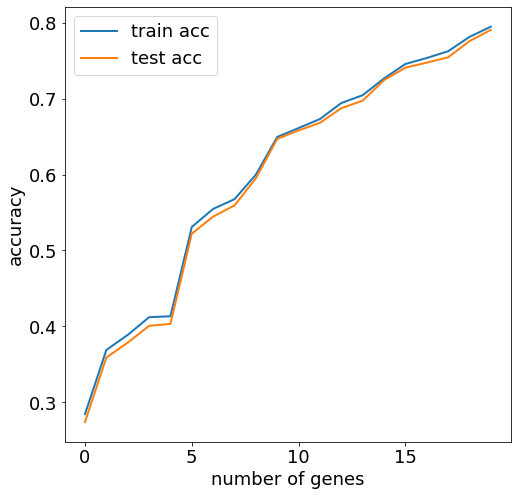

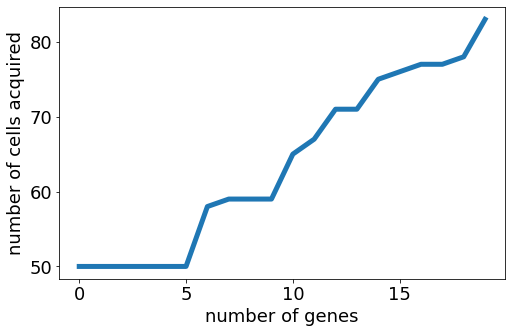

In [ ]:
if __name__ == '__main__':

    t=Timer()
    t.start()
    feature_selected, num_samples_list, samples_global, train_errors,test_errors,train_scores,test_scores,step_times= min_acquisition(
        X_train,y_train,X_test,y_test,num_features=num_features,num_samples=num_samples, init_samples=init_samples)
    elapsed_time=t.stop()
    
    memorys=[]
    memorys.append(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2)
    memorys.append(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/ 1024 ** 2)
    
    text_create(path,'feature_selected',feature_selected)
    text_create(path,'error',train_errors+test_errors)
    text_create(path,'accuracy',train_scores+test_scores)
    text_create(path,'num_samples_list',num_samples_list)
    text_create(path,'samples_global',samples_global)
    text_create(path,'genes_name',gene[feature_selected])
    text_create(path,'elapsed_time',elapsed_time)
    text_create(path,'memory',memorys)

    plt.figure(figsize=(8,8))
    plt.plot(train_scores,linewidth=2)
    plt.plot(test_scores,linewidth=2)
    plt.legend(['train acc','test acc'],prop = {'size':18})
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('accuracy',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/acc.pdf', bbox_inches="tight")

    plt.figure(figsize=(8,5))
    plt.plot(num_samples_list,linewidth=5)
    plt.xlabel('number of genes',fontdict={'weight':'normal','size': 18})
    plt.ylabel('number of cells acquired',fontdict={'weight':'normal','size': 18})
    plt.tick_params(labelsize=18)
    plt.savefig(path+'/cells.pdf', bbox_inches="tight")

# T-SNE of Results

In [19]:
with open('tabula.pickle','rb') as handle:
    raw_data = pickle.load(handle)
    gene=np.array(pickle.load(handle))
    target=np.array(pickle.load(handle))

data_tmp=normalize(raw_data,axis=1, norm='l2')
alpha = 100
data = np.log1p(data_tmp*alpha).toarray().transpose()

del raw_data,data_tmp

print(np.shape(data),np.shape(target),len(np.unique(target)))

(55656, 8661) (55656,) 58


## T-SNE of Original Dataset

/home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


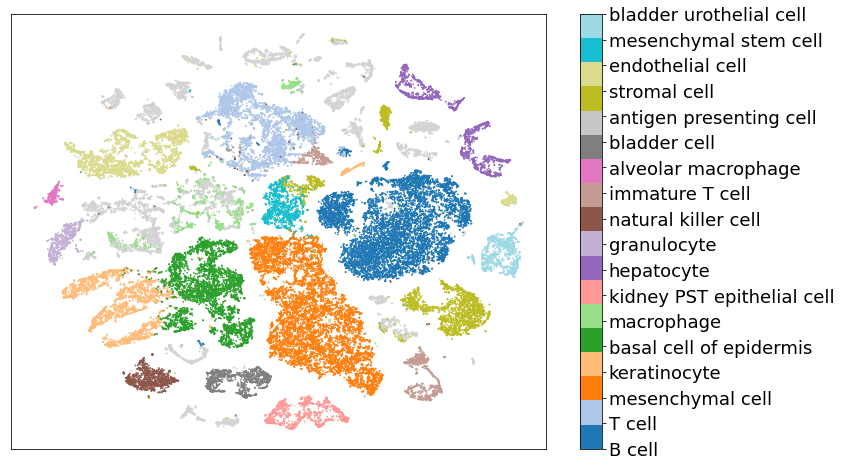

In [20]:
classes=[39,14,46,0,21,51,7,44,9,28,29,45,13,27,50,22,41,52]
keys=['B cell','T cell','mesenchymal cell','keratinocyte','basal cell of epidermis', 'macrophage','kidney PST epithelial cell', 'hepatocyte','granulocyte','natural killer cell','immature T cell','alveolar macrophage', 'bladder cell','antigen presenting cell','stromal cell','endothelial cell','mesenchymal stem cell','bladder urothelial cell']

idx=list([])
labels=target
for i in range(len(classes)):
    tmp=list(np.where(target==classes[i])[0])
    labels[tmp]=i+1
    idx =idx+ tmp
others=list(set(range(np.shape(data)[0])).difference(set(idx)))
labels[others]=-1

pca=PCA(n_components=int(X_train.shape[1]/100),
       copy=True,
       whiten=False,
       svd_solver='auto',
       tol=0.0,
       iterated_power='auto',
       random_state=None)
pcaproj=pca.fit_transform(data)
Y=TSNE(n_components=2).fit_transform(pcaproj)

plt.figure(figsize=(12,8))
c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y[others,0], Y[others,1], c='lightgray', s= 0.5) # plot all cells as background
plt.scatter(Y[idx,0], Y[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 18})
plt.savefig(path+'/tsne.pdf',bbox_inches="tight")
import pickle
f=open(path+'/tsne.pickle','wb') 
pickle.dump(Y,f)
f.close()

## T-SNE with All Genes Selected

/home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


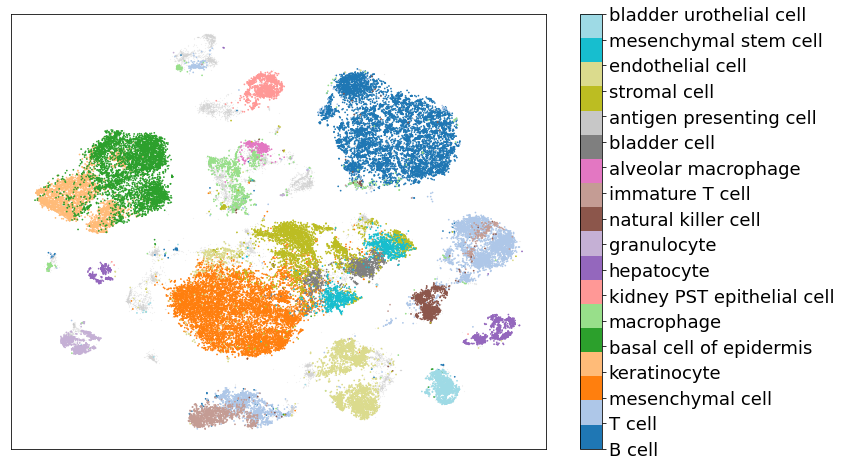

In [22]:
data_selected=data[:,feature_selected]

pca=PCA(n_components=10,
       copy=True,
       whiten=False,
       svd_solver='auto',
       tol=0.0,
       iterated_power='auto',
       random_state=None)
pcaproj=pca.fit_transform(data_selected)

Y_selected=TSNE(n_components=2,perplexity=200,early_exaggeration=1).fit_transform(pcaproj)

plt.figure(figsize=(12,8))

c_cmap = plt.get_cmap('tab20', len(classes))
plt.scatter(Y_selected[others,0], Y_selected[others,1], c='lightgray', s= 0.01) # plot all cells as background
plt.scatter(Y_selected[idx,0], Y_selected[idx,1], c=labels[idx], s=0.5,cmap=c_cmap) # plot subpopulation cells on top
cbar=plt.colorbar(ticks=np.arange(1,len(classes)+1))
plt.xticks([])
plt.yticks([])
cbar.ax.set_yticklabels(keys,fontdict={'weight':'normal','size': 18})
plt.savefig(path+'/tsne_selected_wpca.pdf',bbox_inches="tight")
import pickle
f=open(path+'/tsne_selected_wPCA.pickle','wb') 
pickle.dump(Y_selected,f)
f.close()

## T-SNE of Each Gene

In [ ]:

size=len(feature_selected)
plt.figure(figsize=(30,0.25*size))
gs = gridspec.GridSpec(int(size/10), 10, width_ratios=[7,7,7,7,7,7,7,7,7,7])

for i in range(size):
    f=feature_selected[i]
    ax0 = plt.subplot(gs[i])
    ax0.set_title(gene[f],fontdict={'weight':'normal','size': 18})
    plt.scatter(Y[:,0],Y[:,1],c=data[:,f],s=0.005)
    ax0.set_xticks([])
    ax0.set_yticks([])
plt.savefig(path+'/gene.png',dpi=300,  bbox_inches="tight")    